ค่าเฉลี่ยของแต่ละคลัสเตอร์:
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster                                                           
0                 5.901613          2.748387           4.393548   
1                 5.006000          3.428000           1.462000   
2                 6.850000          3.073684           5.742105   

         petal width (cm)    target  
cluster                              
0                1.433871  1.225806  
1                0.246000  0.000000  
2                2.071053  1.947368  


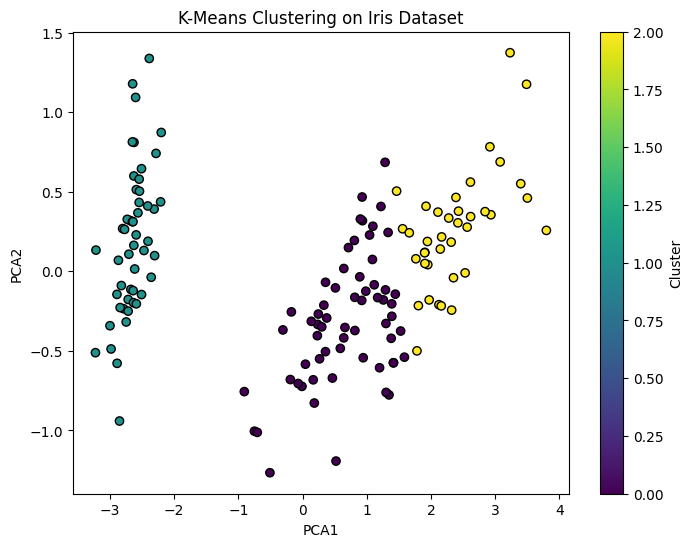

กลุ่มที่ K-Means คาดการณ์สำหรับข้อมูลใหม่:  [0 2]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
#โหลดข้อมูล
iris = datasets.load_iris()
X = iris.data
y = iris.target
#เเปลงข้อมูลเป็น Dataframe
df=pd.DataFrame(X,columns=iris.feature_names)
df['target']=y

kmeans=KMeans(n_clusters=3,random_state=42,n_init=10)

df['cluster']=kmeans.fit_predict(X)

cluster_means=df.groupby('cluster').mean()
print("ค่าเฉลี่ยของแต่ละคลัสเตอร์:")
print(cluster_means)

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=df['cluster'],cmap='viridis',edgecolors='k')
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()

new_data=np.array([[5.5,2.6,4.4,1.2],
                   [6.8,3.2,5.9,2.3]])

predicted_clusters=kmeans.predict(new_data)

print("กลุ่มที่ K-Means คาดการณ์สำหรับข้อมูลใหม่: ",predicted_clusters)


In [6]:
df.groupby('cluster')['target'].value_counts()

cluster  target
0        1         48
         2         14
1        0         50
2        2         36
         1          2
Name: count, dtype: int64